In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/archive.zip man'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/3143991972_7193381aeb.jpg
/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/3145967019_1a83ebf712.jpg
/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/3141613533_595723208d.jpg
/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/3138399980_d6ab8b2272.jpg
/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/3143978284_ac086be9a3.jpg
/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/3138504165_c7ae396294.jpg
/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/3139876823_859c7d7c23.jpg
/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/3141293960_74459f0a24.jpg
/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/3139238055_2817a0c7d8.jpg
/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/3141440149_00becbbb93.jpg
/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/3143155

In [ ]:
'''
gTTS - (Google Text-to-Speech)is a Python library and CLI tool to interface with Google Translate text-to-speech API.

playsound - The playsound module is a cross platform module that can play audio files.
'''
!pip install gtts
!pip install playsound
!pip install ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=9ceaae007b8a631367363fab5350f7516b095d6662a90638b2af00f1bdc90b36
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import all the required libraries

import os                   # Pathname manipulation
import glob                 # For pattern matching of pathnames
import time                 # Provides functions related to time values
import random               # To generate random numbers
import re                   # Regular expressions
from tqdm import tqdm       # Used for creating Progress Meters or Progress Bars ('taqaddum' in arabic for progress)
# Module provides additional data structures for collections of data like defaultdict, ordereddict, counter, Deque, Namedtuple, Chainmap
from collections import Counter, defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

# PIL - Python Imaging Library, adds many image processing features
from PIL import Image
from skimage import io

from sklearn.model_selection import train_test_split

#model building
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.translate.bleu_score import sentence_bleu
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras import Input, layers
from keras import optimizers

from gtts import gTTS
from playsound import playsound
from IPython import display

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [ ]:

images_folder_path = '/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images'
# alternative code> images_folder_path = os.path.join('/','kaggle','input','flickr8k','Images')

captions_file_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/archive.zip man/captions.txt')
# alternative code> captions_file_path = '/kaggle/input/flickr8k/captions.txt'

working_folder_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/archive.zip man')

# Creating a list which contains the path to the images
all_imgs_path_list = glob.glob(images_folder_path + '/*.jpg',recursive=True)
print("The total images present in the dataset: ", len(all_imgs_path_list))

The total images present in the dataset:  8091


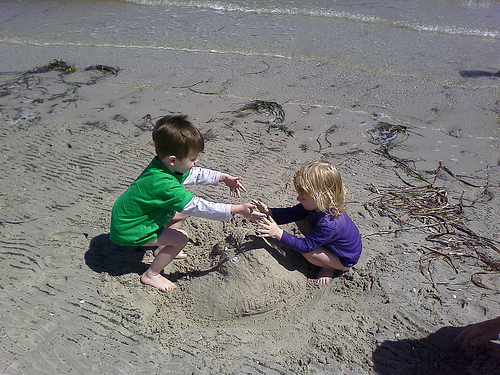

In [ ]:
#Visualising both the images & text present in the dataset

# Visualizing a random image
# Random image index
random_img_index = np.random.randint(low=0, high=len(all_imgs_path_list)-1, size=None, dtype=int)
Image.open(all_imgs_path_list[random_img_index])

In [ ]:
#Importing the dataset and read the text file into a seperate variable

def load_doc(filename):

    text=open(filename).read()
    return text

doc = load_doc(captions_file_path)
print(doc[:500])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
1001773457_577c3


In [ ]:
captions_df = pd.read_csv(captions_file_path) # Creating a captions dataframe with comma seperated values of images & captions

print("Total captions present in the dataset: ", len(list(captions_df.caption)))
print("Total images present in the dataset: ",len(all_imgs_path_list))

captions_df.head()

Total captions present in the dataset:  40455
Total images present in the dataset:  8091


image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...

In [ ]:
all_img_id = list(captions_df.image)    # store all the image id here as list
all_img_vector = all_imgs_path_list     # store all the image path here as list
annotations = list(captions_df.caption) # store all the captions here as list

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['Image-ID','Path', 'Captions'])
# df is dataframe containing image-id, image path and caption
df.head(10)

Image-ID  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   
5  1001773457_577c3a7d70.jpg   
6  1001773457_577c3a7d70.jpg   
7  1001773457_577c3a7d70.jpg   
8  1001773457_577c3a7d70.jpg   
9  1001773457_577c3a7d70.jpg   

                                                Path  \
0  /content/drive/MyDrive/Colab Notebooks/archive...   
1  /content/drive/MyDrive/Colab Notebooks/archive...   
2  /content/drive/MyDrive/Colab Notebooks/archive...   
3  /content/drive/MyDrive/Colab Notebooks/archive...   
4  /content/drive/MyDrive/Colab Notebooks/archive...   
5  /content/drive/MyDrive/Colab Notebooks/archive...   
6  /content/drive/MyDrive/Colab Notebooks/archive...   
7  /content/drive/MyDrive/Colab Notebooks/archive...   
8  /content/drive/MyDrive/Colab Notebooks/archive...   
9  /content/drive/MyDrive/Colab Notebooks/archive...   

                                            Captions  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  
5         A black dog and a spotted dog are fighting  
6  A black dog and a tri-colored dog playing with...  
7  A black dog and a white dog with brown spots a...  
8  Two dogs of different breeds looking at each o...  
9    Two dogs on pavement moving toward each other .

In [ ]:
# Adding the <start> & <end> token to all those captions as well

start_token = '<start>'
end_token = '<end>'

image_path_to_caption = defaultdict(list) # Dictionary with key: image id, values: list of 5 captions

for idx, row in captions_df.iterrows():
    caption = f'{start_token} {row.caption} {end_token}' # adding <start> & <end> token for each caption
    image_path = os.path.join(images_folder_path,row.image) # image_path contains list of image paths
    image_path_to_caption[image_path].append(caption) # Generates dictionary of image_path: caption

In [ ]:
image_path_to_caption

defaultdict(list,
            {'/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/1000268201_693b08cb0e.jpg': ['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
              '<start> A girl going into a wooden building . <end>',
              '<start> A little girl climbing into a wooden playhouse . <end>',
              '<start> A little girl climbing the stairs to her playhouse . <end>',
              '<start> A little girl in a pink dress going into a wooden cabin . <end>'],
             '/content/drive/MyDrive/Colab Notebooks/archive.zip man/Images/1001773457_577c3a7d70.jpg': ['<start> A black dog and a spotted dog are fighting <end>',
              '<start> A black dog and a tri-colored dog playing with each other on the road . <end>',
              '<start> A black dog and a white dog with brown spots are staring at each other in the street . <end>',
              '<start> Two dogs of different breeds looking at each other on t

["<start> A dog 's mouth opens to expose its sharp teeth . <end>", '<start> a dog tries to bite another dog . <end>', '<start> two black and white dogs fighting with each other <end>', '<start> Two dogs play on the wooden floor inside . <end>', '<start> Two dogs play with each other on a wood floor . <end>']


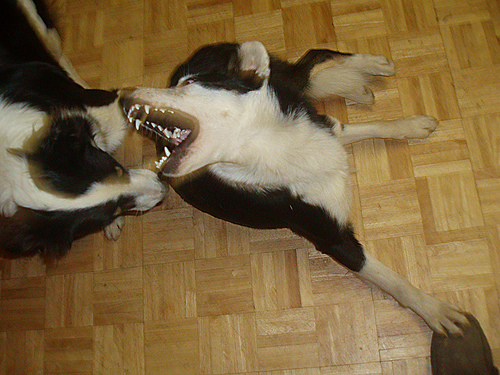

In [ ]:
# Visualizing a random image and its captions

image_num = np.random.randint(low=0, high=len(all_imgs_path_list)-1, size=None, dtype=int)
print(list(image_path_to_caption.values())[image_num])
Image.open(list(image_path_to_caption.keys())[image_num])

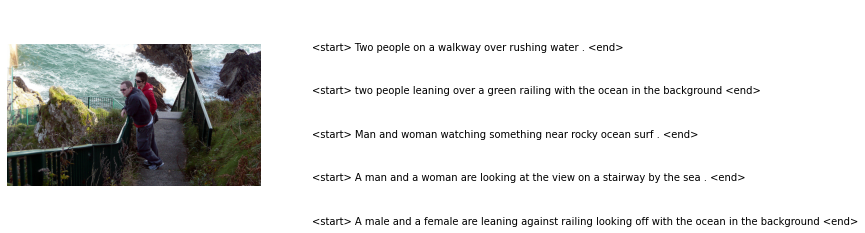

In [ ]:

# Visualizing image and corresponding captions

img_path_from_dict = list(image_path_to_caption.keys())
all_captions = []  # Caption list containing captions with start & end token for all the images
img_name_vector = [] # Creating image path list (ordered based on caption sets of 5, captions with start & end token)

for img_path in img_path_from_dict:

    # Caption list containing 5 captions with start & end token corresponding to a single image
    caption_list = image_path_to_caption[img_path]

    # Caption list containing captions with start & end token for all images
    all_captions.extend(caption_list)

    # Creating image path list (ordered based on caption sets of 5, captions with start & end token)
    img_name_vector.extend([img_path] * len(caption_list))

# random image index
image_num = np.random.randint(low=0, high=len(all_imgs_path_list)-1, size=None, dtype=int)
image_num = image_num//5
image_num = image_num*5

f, axes = plt.subplots(1, 2)
plt.axis('off')
f.set_figwidth(10)
axes[0].imshow(io.imread(img_name_vector[image_num]))
axes[0].axis('off')
axes[1].set_ylim(0,5)
for i in range(0,5):
    axes[1].text(0,i,all_captions[i+image_num])

In [ ]:
# Creating the vocabulary & the counter for the captions

vocabulary= [word.lower() for line in annotations for word in line.split()]

val_count=Counter(vocabulary)

In [ ]:
val_count

Counter({'a': 62986,
         'child': 1545,
         'in': 18974,
         'pink': 735,
         'dress': 348,
         'is': 9345,
         'climbing': 502,
         'up': 1260,
         'set': 108,
         'of': 6713,
         'stairs': 109,
         'an': 2432,
         'entry': 1,
         'way': 50,
         '.': 36577,
         'girl': 3328,
         'going': 149,
         'into': 1074,
         'wooden': 284,
         'building': 510,
         'little': 1768,
         'playhouse': 6,
         'the': 18418,
         'to': 3173,
         'her': 1178,
         'cabin': 4,
         'black': 3832,
         'dog': 8136,
         'and': 8851,
         'spotted': 37,
         'are': 3504,
         'fighting': 132,
         'tri-colored': 14,
         'playing': 2008,
         'with': 7765,
         'each': 430,
         'other': 773,
         'on': 10743,
         'road': 388,
         'white': 3940,
         'brown': 2563,
         'spots': 29,
         'staring': 57,
         'at': 

       Word  Count
0         a  62986
1         .  36577
2        in  18974
3       the  18418
4        on  10743
5        is   9345
6       and   8851
7       dog   8136
8      with   7765
9       man   7265
10       of   6713
11      two   5638
12    white   3940
13    black   3832
14      boy   3581
15      are   3504
16    woman   3402
17     girl   3328
18        ,   3232
19       to   3173
20  wearing   3062
21       at   2914
22   people   2883
23    water   2783
24      red   2672
25    young   2630
26    brown   2563
27       an   2432
28      his   2357
29     blue   2268


Text(0, 0.5, 'Count')

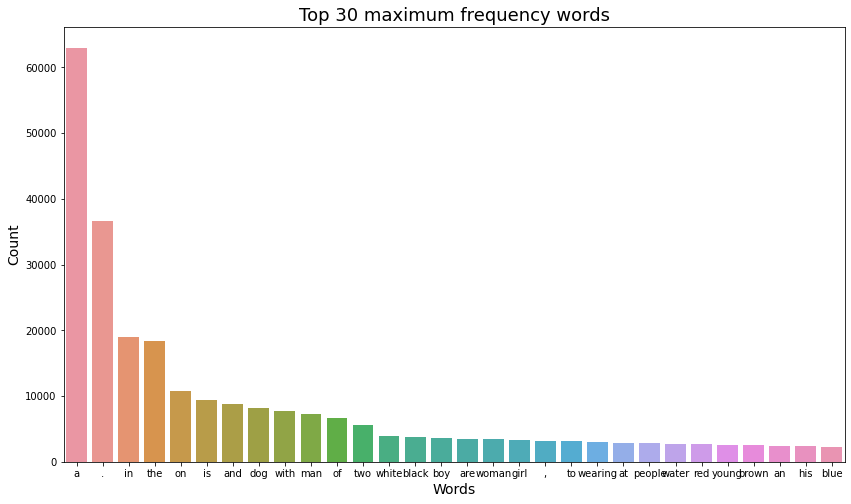

In [ ]:
# Visualising the top 30 occuring words in the captions

top30_words_countwise = val_count.most_common(30)
top30_words_df = pd.DataFrame(top30_words_countwise, columns = ['Word', 'Count'])
print(top30_words_df)

fig = plt.figure(figsize=(14,8))
sns.barplot(x='Word', y='Count', data = top30_words_df)
plt.title("Top 30 maximum frequency words", fontsize = 18)
plt.xlabel("Words", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

In [ ]:
# creating the tokenizer

# Top 5000 words
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
# annotations =  list of all captions
# fit_on_texts >> Updates internal vocabulary based on a list of texts, in case of texts containing lists, each entry of the lists is assumed to be a token.
# Required before using `texts_to_sequences`
tokenizer.fit_on_texts(all_captions)
# Transforms each text in texts to a sequence of integers
tokenized_text_sequence = tokenizer.texts_to_sequences(all_captions)
tokenized_text_sequence[:5]

[[3, 2, 44, 5, 2, 91, 173, 8, 120, 52, 2, 394, 13, 395, 5, 29, 1, 671, 4],
 [3, 2, 20, 317, 65, 2, 197, 118, 4],
 [3, 2, 41, 20, 120, 65, 2, 197, 2438, 4],
 [3, 2, 41, 20, 120, 6, 395, 21, 61, 2438, 4],
 [3, 2, 41, 20, 5, 2, 91, 173, 317, 65, 2, 197, 2982, 4]]

In [ ]:
# Creating word-to-index and index-to-word mappings.

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'
tokenized_text_sequence = tokenizer.texts_to_sequences(all_captions)
tokenized_text_sequence[:5]

[[3, 2, 44, 5, 2, 91, 173, 8, 120, 52, 2, 394, 13, 395, 5, 29, 1, 671, 4],
 [3, 2, 20, 317, 65, 2, 197, 118, 4],
 [3, 2, 41, 20, 120, 65, 2, 197, 2438, 4],
 [3, 2, 41, 20, 120, 6, 395, 21, 61, 2438, 4],
 [3, 2, 41, 20, 5, 2, 91, 173, 317, 65, 2, 197, 2982, 4]]

In [ ]:
random_index = np.random.randint(low=0, high=len(all_imgs_path_list)-1, size=None, dtype=int)
print(all_captions[random_index])
print(tokenized_text_sequence[random_index])

<start> An animal with horns jumping in a field . <end>
[3, 29, 428, 11, 2179, 46, 5, 2, 53, 4]


In [ ]:
# Creating a word count of your tokenizer to visulize the Top 30 occuring words after text processing

dict_word_count = tokenizer.word_counts
dict_word_count

OrderedDict([('<start>', 40455),
             ('a', 62992),
             ('child', 1545),
             ('in', 18986),
             ('pink', 739),
             ('dress', 348),
             ('is', 9345),
             ('climbing', 507),
             ('up', 1302),
             ('set', 109),
             ('of', 6723),
             ('stairs', 109),
             ('an', 2432),
             ('entry', 1),
             ('way', 53),
             ('<end>', 40455),
             ('girl', 3328),
             ('going', 149),
             ('into', 1074),
             ('wooden', 284),
             ('building', 510),
             ('little', 1768),
             ('playhouse', 6),
             ('the', 18419),
             ('to', 3176),
             ('her', 1178),
             ('cabin', 4),
             ('black', 3848),
             ('dog', 8138),
             ('and', 8862),
             ('spotted', 38),
             ('are', 3504),
             ('fighting', 133),
             ('tri', 14),
             ('color

       Word  Count
0         a  62992
1   <start>  40455
2     <end>  40455
3        in  18986
4       the  18419
5        on  10745
6        is   9345
7       and   8862
8       dog   8138
9      with   7765
10      man   7274
11       of   6723
12      two   5642
13    white   3959
14    black   3848
15      boy   3581
16      are   3504
17    woman   3402
18     girl   3328
19       to   3176
20  wearing   3062
21       at   2915
22   people   2883
23    water   2790
24      red   2691
25    young   2630
26    brown   2578
27       an   2432
28      his   2357
29     blue   2279


Text(0, 0.5, 'Count')

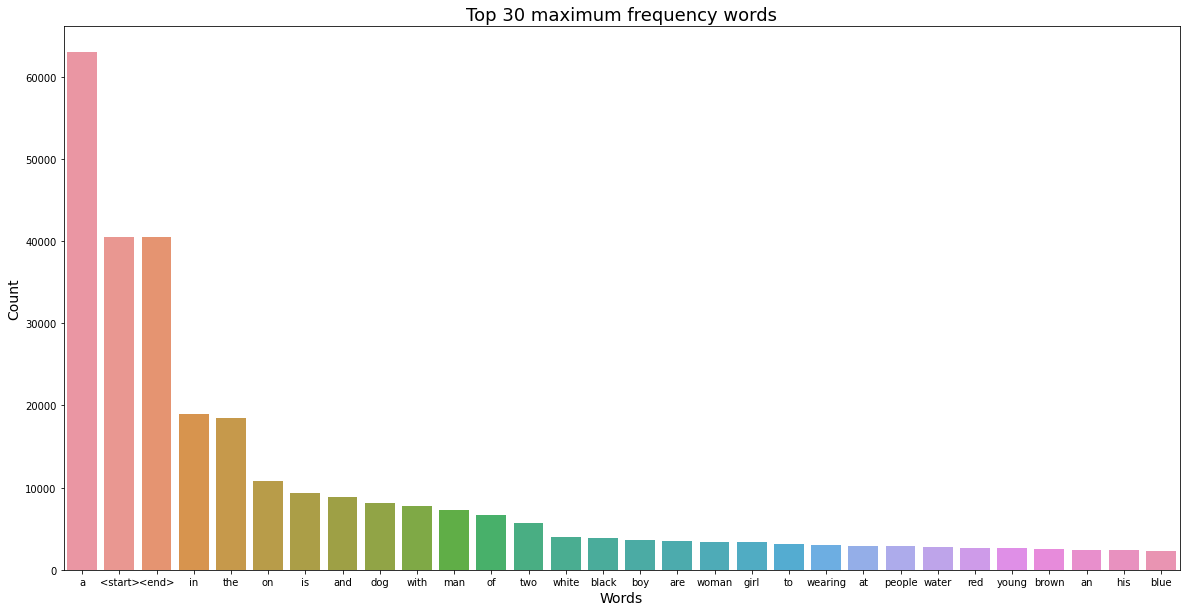

In [ ]:
# Visualising the top 30 occuring words in the captions after text processing

tokenized_word_count = sorted(tokenizer.word_counts.items(), key=lambda x:x[1], reverse=True)
tokenized_word_count_df = pd.DataFrame(tokenized_word_count, columns = ['Word', 'Count'])
top30_tokenized_words_df = tokenized_word_count_df.iloc[0:30,:]
print(top30_tokenized_words_df)

fig = plt.figure(figsize=(20,10))
sns.barplot(x='Word', y='Count', data = top30_tokenized_words_df)
plt.title("Top 30 maximum frequency words", fontsize = 18)
plt.xlabel("Words", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

In [ ]:
# all_captions - all captions list including start & end token
all_tokenized_text_sequence = tokenizer.texts_to_sequences(all_captions)

max_length_caption = max(len(i) for i in all_tokenized_text_sequence)
print('Maximum length of any caption in the dataset: ', max_length_caption)

Maximum length of any caption in the dataset:  39


In [ ]:
# all_captions - all captions list including start & end token
all_tokenized_text_sequence = tokenizer.texts_to_sequences(all_captions)
max_length_caption = max(len(i) for i in all_tokenized_text_sequence)
print('Maximum length of any caption in the dataset: ', max_length_caption)

Maximum length of any caption in the dataset:  39


In [ ]:
# Padding each vector to the max_length of the captions ^ store it to a vairable

cap_vector = tf.keras.preprocessing.sequence.pad_sequences(all_tokenized_text_sequence, padding = 'post',maxlen = max_length_caption)

print("The shape of Caption vector is :" + str(cap_vector.shape))
cap_vector[1:3,:]

The shape of Caption vector is :(40455, 39)


array([[   3,    2,   20,  317,   65,    2,  197,  118,    4,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   3,    2,   41,   20,  120,   65,    2,  197, 2438,    4,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32)

In [ ]:
# Creating the function which returns images & their path

def load_image(image_path):
    #write your pre-processing steps here
    preprocessed_img = tf.io.read_file(image_path)
    preprocessed_img = tf.image.decode_jpeg(preprocessed_img, channels=3)
    preprocessed_img = tf.image.resize(preprocessed_img, (299, 299))
    # tf.keras.applications.inception_v3.preprocess_input will normalize input to range of -1 to 1
    preprocessed_img = tf.keras.applications.inception_v3.preprocess_input(preprocessed_img)
    return preprocessed_img, image_path

In [ ]:
# Applying the function to the image path dataset, such that the transformed dataset would contain images & their path

encode_train_set = sorted(set(img_name_vector))    # img_name_vector - path list of all images according to caption set with start & end token

image_data_set = tf.data.Dataset.from_tensor_slices(encode_train_set)
image_data_set = image_data_set.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)
image_data_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input                    #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output     #write code here to get the output of the image_model

image_features_extract_model = keras.Model(new_input, hidden_layer)   #build the final model using both input & output layer

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [ ]:
# Applying the feature_extraction model to earlier created dataset which contained images & their respective paths

feature_dict = {}

# using tqdm for progress bar
for image,path in tqdm(image_data_set):

    # feed images from newly created Dataset above to Inception V3 built above
    batch_features = image_features_extract_model(image)

    # To squeeze out the features in a batch, to reshape features in order of (batch_size, 8*8, 2048)
    batch_features_reshaped = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))

    for batch_f, p in zip(batch_features_reshaped, path):
        path_of_feature = p.numpy().decode("utf-8")
        feature_dict[path_of_feature] =  batch_f.numpy()

100%|██████████| 253/253 [02:50<00:00,  1.48it/s]


In [ ]:
image_data_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [ ]:
batch_features

<tf.Tensor: shape=(27, 8, 8, 2048), dtype=float32, numpy=
array([[[[0.00000000e+00, 7.73892775e-02, 0.00000000e+00, ...,
          2.32150659e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.07980251e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.94098771e-01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.85816810e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          9.41560790e-02, 0.00000000e+00, 5.05769014e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 4.22866344e-01, 1.32809458e-02, ...,
          2.33940706e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         

In [ ]:
print('Shape of batch_features - ',batch_features.shape)
print('Shape of batch_features_reshaped - ',batch_features_reshaped.shape)
print('Shape of feature extracted for an image',batch_f.shape)

Shape of batch_features -  (27, 8, 8, 2048)
Shape of batch_features_reshaped -  (27, 64, 2048)
Shape of feature extracted for an image (64, 2048)


In [ ]:
# Applying train_test_split on both image path & captions to create the train & test list.
# Creating the train-test spliit using 80-20 ratio & random state = 42

path_train, path_test, cap_train, cap_test = train_test_split(img_name_vector, cap_vector, test_size=0.2, random_state=42)
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [ ]:
def map_func(image_name,capt):
  image_tensor = feature_dict[image_name.decode('utf-8')]    # Code to extract the features from the dictionary stored earlier
  return image_tensor,capt

In [ ]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000
def gen_dataset(images_data, captions_data):

    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))
    dataset = dataset.shuffle(BUFFER_SIZE)

    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)

    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [ ]:
train_dataset=gen_dataset(path_train,cap_train)
test_dataset=gen_dataset(path_test,cap_test)

In [ ]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(32, 64, 2048)
(32, 39)


In [ ]:
# Setting the parameters

embedding_dim = 256
units = 512
vocab_size = 5001   #top 5,000 words +1
train_num_steps = len(path_train) // BATCH_SIZE
test_num_steps = len(path_test) // BATCH_SIZE

features_shape = batch_f.shape[1]
attention_features_shape = batch_f.shape[0]

In [ ]:
class Encoder(Model):
    def __init__(self,embedding_dim):
        super(Encoder, self).__init__()
        self.dense = layers.Dense(embedding_dim)       #build your Dense layer with relu activation

    def call(self, features, training=False):
        # extract the features from the image shape: (batch, 8*8, embed_dim)
        features = self.dense(features)
        features = tf.nn.relu(features)
        return features

In [ ]:
encoder=Encoder(embedding_dim)

In [ ]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = layers.Dense(units)       #build Dense layer
        self.W2 = layers.Dense(units)       #build Dense layer
        self.V = layers.Dense(1)            #build final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)

        # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        hidden_with_time_axis =  tf.expand_dims(hidden, 1)

        # build the score funciton to shape: (batch_size, 8*8, units)
        score = keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

        # extract the attention weights with shape: (batch_size, 8*8, 1)
        attention_weights = keras.activations.softmax(self.V(score), axis=1)

        #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = attention_weights * features
        # reduce the shape to (batch_size, embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

In [ ]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)                # iniitalise the Attention model with units
        self.embed = layers.Embedding(vocab_size, embedding_dim)    # build the Embedding layer
        self.gru = layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = layers.Dense(self.units)              # build the Dense layer
        self.d2 = layers.Dense(vocab_size)              # build the Dense layer

    def call(self,x,features, hidden):
        #create the context vector & attention weights from attention model
        context_vector, attention_weights = self.attention(features, hidden)
        # embed the input to shape: (batch_size, 1, embedding_dim)
        embed = self.embed(x)
        # Concatenate the input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)
        # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output,state = self.gru(embed)
        output = self.d1(output)
        # shape : (batch_size * max_length, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))
        # shape : (batch_size * max_length, vocab_size)
        output = self.d2(output)

        return output, state, attention_weights

    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [ ]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [ ]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (32, 64, 256)
Predcitions shape from Decoder: (32, 5001)
Attention weights shape from Decoder: (32, 64, 1)


In [ ]:
LR = 2e-4
optimizer = tf.keras.optimizers.Adam(learning_rate = LR)         #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction='none')   #define the loss object

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = os.path.join(working_folder_path,'checkpoint')
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [ ]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [ ]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)

    avg_loss = (loss/int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, avg_loss

In [ ]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)

    avg_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))


    return loss, avg_loss

In [ ]:
def test_loss_cal(test_dataset):
    total_loss = 0

    # Code to get the average loss result on our test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
    avg_test_loss=total_loss/test_num_steps

    return avg_test_loss

In [ ]:
loss_plot = []
test_loss_plot = []
EPOCHS = 20

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps

    loss_plot.append(avg_train_loss)
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)

    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/20 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.350, & test loss is 1.125
Time taken for 1 epoch 245.9236352443695 sec

Test loss has been reduced from 100.000 to 1.125


  5%|▌         | 1/20 [04:06<1:18:08, 246.79s/it]

For epoch: 2, the train loss is 1.041, & test loss is 0.998
Time taken for 1 epoch 116.4776349067688 sec

Test loss has been reduced from 1.125 to 0.998


 10%|█         | 2/20 [06:03<51:06, 170.36s/it]  

For epoch: 3, the train loss is 0.954, & test loss is 0.930
Time taken for 1 epoch 112.4899971485138 sec

Test loss has been reduced from 0.998 to 0.930


 15%|█▌        | 3/20 [07:56<40:51, 144.20s/it]

For epoch: 4, the train loss is 0.897, & test loss is 0.881
Time taken for 1 epoch 126.6704409122467 sec

Test loss has been reduced from 0.930 to 0.881


 20%|██        | 4/20 [10:03<36:38, 137.43s/it]

For epoch: 5, the train loss is 0.853, & test loss is 0.840
Time taken for 1 epoch 123.1216254234314 sec

Test loss has been reduced from 0.881 to 0.840


 25%|██▌       | 5/20 [12:07<33:07, 132.50s/it]

For epoch: 6, the train loss is 0.816, & test loss is 0.805
Time taken for 1 epoch 110.24606537818909 sec

Test loss has been reduced from 0.840 to 0.805


 30%|███       | 6/20 [13:58<29:11, 125.08s/it]

For epoch: 7, the train loss is 0.785, & test loss is 0.776
Time taken for 1 epoch 111.55765771865845 sec

Test loss has been reduced from 0.805 to 0.776


 35%|███▌      | 7/20 [15:50<26:11, 120.85s/it]

For epoch: 8, the train loss is 0.757, & test loss is 0.748
Time taken for 1 epoch 109.28463935852051 sec

Test loss has been reduced from 0.776 to 0.748


 40%|████      | 8/20 [17:40<23:27, 117.29s/it]

For epoch: 9, the train loss is 0.730, & test loss is 0.724
Time taken for 1 epoch 109.31678557395935 sec

Test loss has been reduced from 0.748 to 0.724


 45%|████▌     | 9/20 [19:29<21:04, 114.98s/it]

For epoch: 10, the train loss is 0.707, & test loss is 0.701
Time taken for 1 epoch 109.70197224617004 sec

Test loss has been reduced from 0.724 to 0.701


 50%|█████     | 10/20 [21:20<18:55, 113.55s/it]

For epoch: 11, the train loss is 0.685, & test loss is 0.680
Time taken for 1 epoch 109.23673343658447 sec

Test loss has been reduced from 0.701 to 0.680


 55%|█████▌    | 11/20 [23:10<16:51, 112.41s/it]

For epoch: 12, the train loss is 0.664, & test loss is 0.660
Time taken for 1 epoch 109.23998618125916 sec

Test loss has been reduced from 0.680 to 0.660


 60%|██████    | 12/20 [24:59<14:52, 111.57s/it]

For epoch: 13, the train loss is 0.648, & test loss is 0.641
Time taken for 1 epoch 109.71332740783691 sec

Test loss has been reduced from 0.660 to 0.641


 65%|██████▌   | 13/20 [26:50<12:58, 111.19s/it]

For epoch: 14, the train loss is 0.627, & test loss is 0.624
Time taken for 1 epoch 109.08517742156982 sec

Test loss has been reduced from 0.641 to 0.624


 70%|███████   | 14/20 [28:39<11:04, 110.68s/it]

For epoch: 15, the train loss is 0.610, & test loss is 0.606
Time taken for 1 epoch 109.8008394241333 sec

Test loss has been reduced from 0.624 to 0.606


 75%|███████▌  | 15/20 [30:29<09:12, 110.54s/it]

For epoch: 16, the train loss is 0.592, & test loss is 0.590
Time taken for 1 epoch 109.16392302513123 sec

Test loss has been reduced from 0.606 to 0.590


 80%|████████  | 16/20 [32:19<07:20, 110.24s/it]

For epoch: 17, the train loss is 0.577, & test loss is 0.575
Time taken for 1 epoch 109.07328462600708 sec

Test loss has been reduced from 0.590 to 0.575


 85%|████████▌ | 17/20 [34:08<05:30, 110.02s/it]

For epoch: 18, the train loss is 0.561, & test loss is 0.559
Time taken for 1 epoch 109.52061772346497 sec

Test loss has been reduced from 0.575 to 0.559


 90%|█████████ | 18/20 [35:58<03:40, 110.03s/it]

For epoch: 19, the train loss is 0.547, & test loss is 0.546
Time taken for 1 epoch 109.10923051834106 sec

Test loss has been reduced from 0.559 to 0.546


 95%|█████████▌| 19/20 [37:48<01:49, 109.87s/it]

For epoch: 20, the train loss is 0.532, & test loss is 0.530
Time taken for 1 epoch 109.92493391036987 sec

Test loss has been reduced from 0.546 to 0.530


100%|██████████| 20/20 [39:38<00:00, 118.94s/it]


No handles with labels found to put in legend.


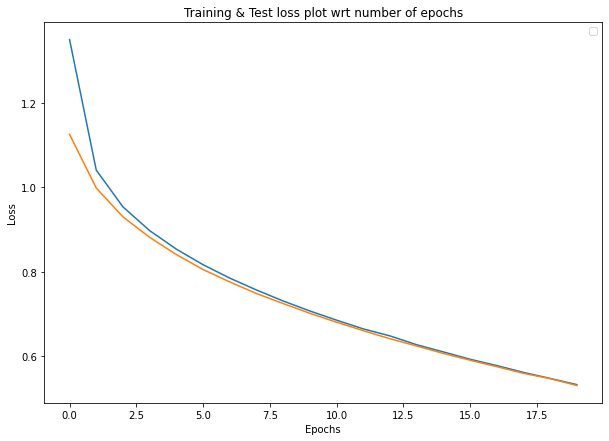

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Test loss plot wrt number of epochs')
plt.legend()
plt.show()

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length_caption, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)  # process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input)        # Extracting features using feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)       # extracting the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length_caption):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)    # getting the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        # extract the predicted id(embedded value) which carries the max value
        predicted_id = tf.argmax(predictions[0]).numpy()
        # map the id to the word from tokenizer and append the value to the result list
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

In [ ]:

def beam_evaluate(image, beam_index = 3):#your value for beam index):

    # to evaluate the result using beam search
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length_caption, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length_caption:
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]

            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)

                prob += np.log(predictions[0][w])

                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]


        predicted_id = result[-1]
        pred_list = predicted_id[0]

        prd_id = pred_list[-1]
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)
        else:
            break


    result2 = result[-1][0]

    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)

        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])

    return final_caption

In [ ]:
def plot_attention_map(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))

    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))

        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)

        img=ax.imshow(temp_img)

        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [ ]:
def filt_text(text):
    filt=['<start>','<unk>','<end>']
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [ ]:
def caption_prediction(autoplay=False, weights=(0.5, 0.5, 0, 0)):
    rid = np.random.randint(0, len(path_test))
    test_image = path_test[rid]
    #test_image = './images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_image)


    real_caption=filt_text(real_caption)


    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights = weights)     #set your weights)
    print(f"BELU score: {score*100}")

    print('Real Caption:', real_caption)
    print(f"Prediction Caption: {pred_caption}")
    plot_attention_map(result, attention_plot, test_image)

    # we make use of Google Text to Speech API (online), which will convert the caption to audio
    speech = gTTS('Predicted Caption : ' + pred_caption, lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'

    display.display(display.Audio(audio_file, rate = None, autoplay = autoplay))

    return Image.open(test_image)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 26.524962317980787
Real Caption: four people walking down the street and one is trying to jump in a shopping cart
Prediction Caption: a group of people are standing on a street


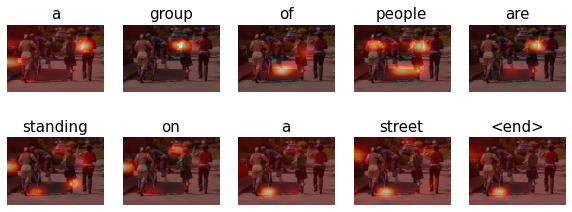

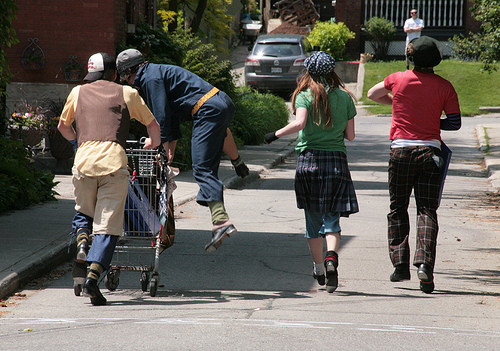

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 40.495158902656925
Real Caption: three people make their way through rocky terrain
Prediction Caption: three people are standing on a rock


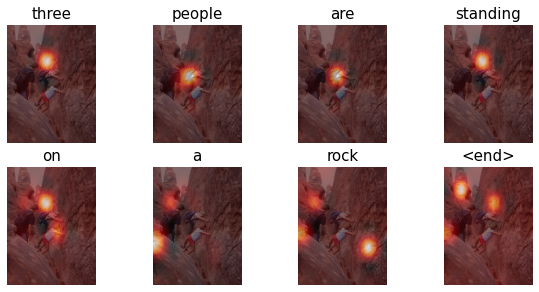

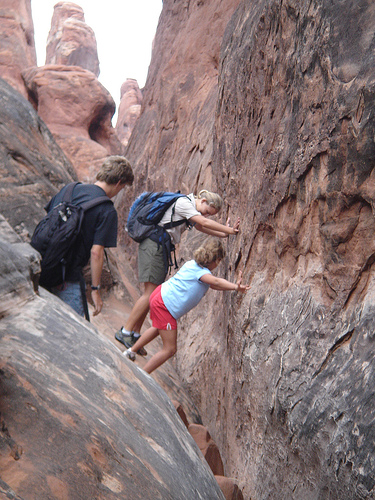

In [ ]:
caption_prediction(autoplay=True, weights=(0.25, 0.25, 0, 0))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 57.735026918962575
Real Caption: car racing on a dirt road
Prediction Caption: a race car kicks up dust


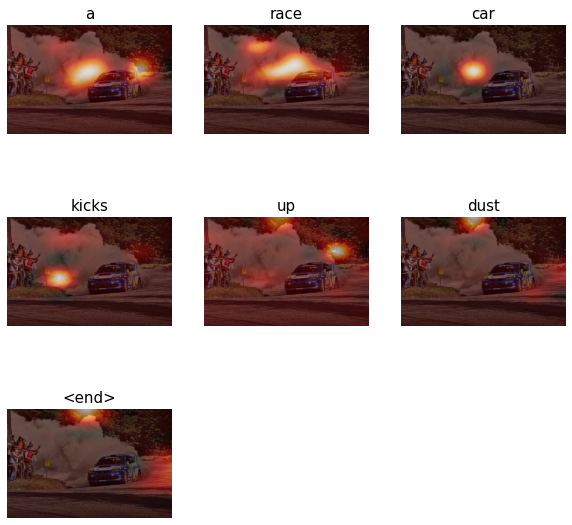

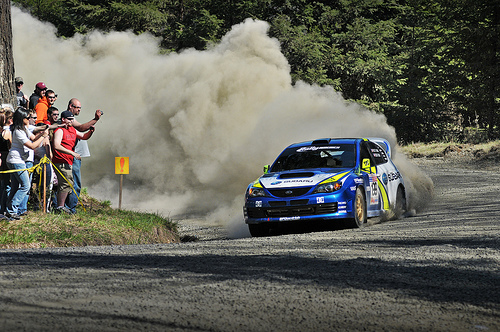

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.4, 0.3, 0.2))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 9.72530475212072
Real Caption: two dogs with the same coloring look like they are going to bite each other in the face
Prediction Caption: two dogs fighting in the snow


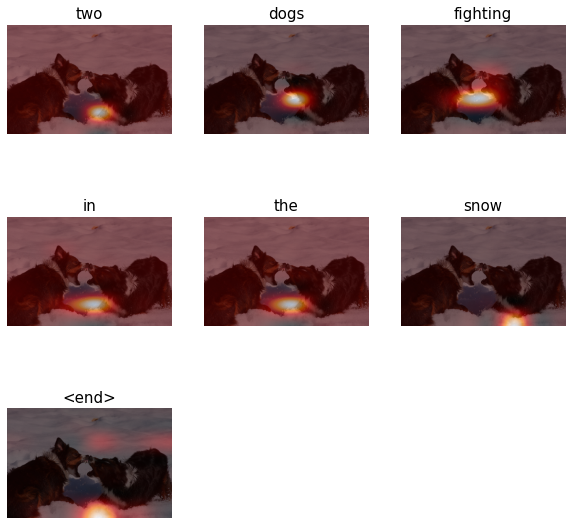

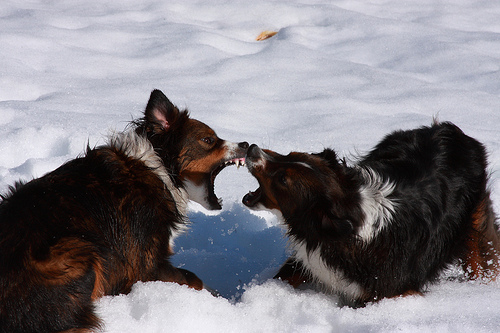

In [ ]:
caption_prediction(autoplay=True, weights=(0.25, 0.25, 0.25, 0.25))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

In [ ]:
caption_prediction(autoplay=True, weights=(0.5, 0.5, 0, 0))

NameError: ignored